# Install Libraries

In [ ]:
pip install -U requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U bitsandbytes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U git+https://github.com/huggingface/transformers.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-71hebemy
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-71hebemy
  Resolved https://github.com/huggingface/transformers.git to commit 7a7f27697ad17d4ff03dbe203095be8b71759b55
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U git+https://github.com/huggingface/peft.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-_wl3cs2p
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-_wl3cs2p
  Resolved https://github.com/huggingface/peft.git to commit 3f9ce553e21569e21269b5ba91d7390f7229199a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U git+https://github.com/huggingface/accelerate.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-_jqslh9u
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-_jqslh9u
  Resolved https://github.com/huggingface/accelerate.git to commit 60461ff7c479b9ea60757ec18279ad3cf84d29cb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install newsapi-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load Disease Table

In [1]:
import json
with open('diseases.json', 'r') as f:
    # Load the JSON data from the file
    disease_table = json.load(f)

# Query API

In [2]:
import requests
filter_key = ['whooping', 'Fever', 'mpox', 'coli']
url = f"https://newsapi.org/v2/top-headlines?country=us&category=health&pageSize=100&apiKey=38a5c18e23b04ed387b8c60f83bf0b37"
response = requests.get(url)
if response.status_code == 200:
    articles = response.json().get("articles", [])
    #print(articles)
else:
    print(f"Error: {response.status_code}, {response.text}")

for id in filter_key:
    url = f"https://newsapi.org/v2/everything?q={id}&language=en&apiKey=38a5c18e23b04ed387b8c60f83bf0b37"
    response = requests.get(url)
    if response.status_code == 200:
        articles.extend(response.json().get("articles", []))
        #print(response.json().get("articles"))
    else:
        print(f"Error: {response.status_code}, {response.text}")

# NER for disease/location keywords

In [3]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

loc_ner = pipeline("ner", model=model, tokenizer=tokenizer)
med_ner = pipeline("token-classification", model="blaze999/Medical-NER")
example = "Long COVID can strike anyone, rich or poor, but a growing body of evidence suggests poor and middle income Americans like Rick Henline suffer most."
loc_results = loc_ner(example)
med_results = med_ner(example)
print(loc_results)
print(med_results)

2024-12-03 13:22:14.380273: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
D

[{'entity': 'B-MISC', 'score': 0.99930394, 'index': 24, 'word': 'Americans', 'start': 107, 'end': 116}, {'entity': 'B-PER', 'score': 0.9997677, 'index': 26, 'word': 'Rick', 'start': 122, 'end': 126}, {'entity': 'I-PER', 'score': 0.9995826, 'index': 27, 'word': 'He', 'start': 127, 'end': 129}, {'entity': 'I-PER', 'score': 0.97837, 'index': 28, 'word': '##n', 'start': 129, 'end': 130}, {'entity': 'I-PER', 'score': 0.97271055, 'index': 29, 'word': '##line', 'start': 130, 'end': 134}]
[{'entity': 'B-DETAILED_DESCRIPTION', 'score': 0.13359478, 'index': 1, 'word': '▁Long', 'start': 0, 'end': 4}, {'entity': 'I-DISEASE_DISORDER', 'score': 0.10011833, 'index': 3, 'word': 'VID', 'start': 7, 'end': 10}, {'entity': 'I-DETAILED_DESCRIPTION', 'score': 0.2096163, 'index': 22, 'word': '▁income', 'start': 99, 'end': 106}]


In [4]:
# Function to reconstruct entities
import re
def extract_target_entity(entities):
    target_words = []
    start_flag = True
    disease =""
    for entity in entities:
        if entity['score'] < 0.1:
            continue
        # Check if entity type matches the target type
        if entity['entity']=='B-DISEASE_DISORDER':
            if disease != "":
                target_words.append(disease)
            disease = entity['word'].lstrip('▁')
        elif entity['entity']=='I-DISEASE_DISORDER':
            if re.search("\▁", entity['word']):
                #print(f"found __{entity['word']}")
                disease = disease + " " + entity['word'].lstrip('▁')
            else:
                #print(f"not found __{entity['word']}")
                disease = disease + entity['word'].lstrip('▁')
        elif entity['entity'] =='B-DIAGNOSTIC_PROCEDURE':
            disease = entity['word'].lstrip('▁')
        elif entity['entity'] == 'I-DIAGNOSTIC_PROCEDURE':
            if re.search("\▁", entity['word']):
                #print(f"found __{entity['word']}")
                disease = disease + " " + entity['word'].lstrip('▁')
            else:
                #print(f"not found __{entity['word']}")
                disease = disease + entity['word'].lstrip('▁')
        else:
            start_flag = False
            if disease != "":
                target_words.append(disease)
            disease = ""
    if disease!="":
        target_words.append(disease)

    # Combine captured words into a single string
    return target_words

# Extract target entity
diseases = extract_target_entity(med_results)
print(diseases)

['VID']


In [5]:
def lookup_disease_symptoms(disease, disease_table):
    found_flag = False
    for disease_name in disease_table.keys():
        # Use regex to split by parentheses
        #names = re.split(r'\s*\(|\)\s*', disease_name)
        names = [name.strip() for name in re.split(r'\s*\(|\)\s*', disease_name) if name.strip()]

        # Remove empty strings from the result
        sub_names = [sub_name for sub_name in names if sub_name]
        #print(sub_names)
        if any(key.lower() in disease.lower() for key in sub_names):
            found_flag = True
            break
    if not found_flag:
        return None
    return disease_name
name = lookup_disease_symptoms(diseases[0], disease_table)

In [6]:
from IPython.display import display, HTML
def get_entities(location_words, diseases):
    entities = []
    loc_dict = {"Location": "US", "color": "lightgreen"}
    disease_dict = {"Disease": "", "color": "lightblue"}
    for disease in diseases:

        # Find disease keywords

        name = lookup_disease_symptoms(disease, disease_table)
        if lookup_disease_symptoms(disease, disease_table) is None:
            continue
        else:
            disease_dict["Symptom"] = disease_table[name]
            disease_dict["Name"] = name
        #if not any(disease.lower() in key.lower() for key in disease_table.keys()):
        #    continue
        disease_dict["Disease"] = disease
        entities.append(disease_dict)
        # Default location to US
        if len(location_words) == 0:
            entities.append(loc_dict)
        for location in location_words:
            loc_dict["Location"] = location
            entities.append(loc_dict)
    #print(f"[ENTITIES]:{entities}")
    return entities

# Function to highlight entities
def highlight_entities(text, entities):
    for entity in entities:
        if 'Disease' in entity:
            word = entity['Disease']
        else:
            word = entity['Location']
        color = entity['color']
        # Wrap word with a span tag with background color
        text = text.replace(
            word,
            f"<span style='background-color: {color}; padding: 2px;'>{word}</span>"
        )
    # Display the highlighted text in JupyterLab
    display(HTML(text))
location_words = [entity['word'] for entity in loc_results if entity['entity'] == 'B-LOC']
entities = get_entities(location_words, diseases)
highlight_entities(example, entities)

In [7]:
headlines_lst = []
descriptions_lst = []
diseases_lst = []
headlines_list = []
for a in articles:
    ### parsing from title
    if (a['title'] == "[Removed]") | (a['title'] is None):
        continue
    loc_results = loc_ner(a['title'])
    med_results = med_ner(a['title'])
    diseases=extract_target_entity(med_results)
    location_words = [entity['word'] for entity in loc_results if entity['entity'] == 'B-LOC']
    entities = get_entities(location_words, diseases)
    if len(entities) == 0:
        continue
    #print("#######")
    entities[0]['title'] = a['title']
    entities[0]['PublishAt'] = a['publishedAt']
    entities[0]['url'] = a['url']
    #print(entities)
    #print("[PublishAt]:")
    #print(a['publishedAt'])
    #print(f"[TITLE]:")
    highlight_entities(a['title'], entities)
    headlines_list.append(entities)
    ### parsing from description
    if (a['description'] == "[Removed]") | (a['description'] is None):
        continue
    loc_results = loc_ner(a['description'])
    med_results = med_ner(a['description'])
    diseases=extract_target_entity(med_results)
    location_words = [entity['word'] for entity in loc_results if entity['entity'] == 'B-LOC']
    entities = get_entities(location_words, diseases)
    if len(entities) == 0:
        continue
    #print(entities)
    #print(f"[DESCRIPTION]:")
    highlight_entities(a['description'], entities)
    #print("[URL]:")
    #print(a['url'])
    headlines_list.append(entities)
    headlines_lst.append(a["title"])
    descriptions_lst.append(a["description"])
    diseases_lst.append(entities[0]["Disease"])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


# Dataset evaluation
## Headlines

In [8]:
from datasets import Dataset
import numpy as np

n_datapoints = len(descriptions_lst)

instructions_lst_np = np.array(["You are a doctor trying to determine what disease outbreak may be occuring based on a news headline. You will be given a headline, and you have to say your prediction of what the disease is" for _ in range(n_datapoints)])
descriptions_lst_np = np.array(headlines_lst)
diseases_lst_np = np.array(diseases_lst)

permutator = np.random.permutation(n_datapoints)

shuffled_instructions = instructions_lst_np[permutator]
shuffled_descriptions = descriptions_lst_np[permutator]
shuffled_diseases = diseases_lst_np[permutator]

train_instructions = shuffled_instructions[:int(n_datapoints * 0.8)]
train_descriptions = shuffled_descriptions[:int(n_datapoints * 0.8)]
train_diseases = shuffled_diseases[:int(n_datapoints * 0.8)]

eval_instructions = shuffled_instructions[int(n_datapoints * 0.8):]
eval_descriptions = shuffled_descriptions[int(n_datapoints * 0.8):]
eval_diseases = shuffled_diseases[int(n_datapoints * 0.8):]

train_dataset_dict = {
    "instruction": train_instructions,
    "input": train_descriptions,
    "output": train_diseases
}
eval_dataset_dict = {
    "instruction": eval_instructions,
    "input": eval_descriptions,
    "output": eval_diseases
}

train_headline_dataset = Dataset.from_dict(train_dataset_dict)
eval_headline_dataset = Dataset.from_dict(eval_dataset_dict)

# show the current diseases on headlines

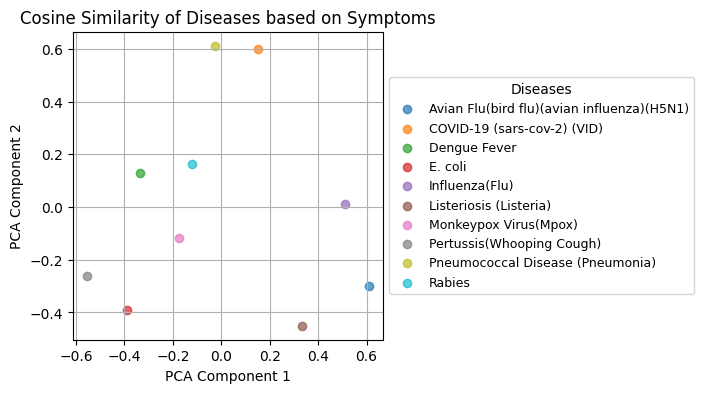

In [9]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data=headlines_list
#new_symptom = 'running nose, fever and cough'
diseases_lst = [entry[0]['Name'] for entry in data]
diseases_lst = np.unique(diseases_lst)
symptoms_lst = [disease_table[disease] for disease in diseases_lst[:10]]
#symptoms_lst = np.append(symptoms_lst, new_symptom)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(symptoms_lst)

pca_transformer = PCA(n_components=2)
reduced_coords = pca_transformer.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(4, 4))
for i, disease in enumerate(diseases_lst[:10]):
    plt.scatter(reduced_coords[i, 0], reduced_coords[i, 1], label=disease, alpha=0.7)
#new_symptom_coords = reduced_coords[-1]  # Get the last coordinate for the new symptom
#plt.scatter(new_symptom_coords[0], new_symptom_coords[1], color='red', label=new_symptom, alpha=0.7)

plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # Anchor legend box outside the plot
    title="Diseases",
    fontsize=9,
    title_fontsize=10
)

plt.title("Cosine Similarity of Diseases based on Symptoms")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Find closest diseases on the headlines

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
def find_similiar_disease(query):

    new_symptom_vector = vectorizer.transform([query])  # Transform new symptom

    # Calculate cosine similarities
    similarities = cosine_similarity(new_symptom_vector, tfidf_matrix).flatten()

    # Find the closest disease
    closest_disease_index = similarities.argmax()
    
    if max(similarities) < 0.5:
        return None
    closest_disease = diseases_lst[closest_disease_index]

    # Find the URL
    url = None
    title = None
    publish_time = None
    for entry in headlines_list:
        if entry[0].get('Name') == closest_disease:
            title = entry[0].get('title')
            publish_time = entry[0].get('PublishAt')
            url = entry[0].get('url')
            break
    reference_text = f"\n\nYou are likely to have {closest_disease}.\nFrom recent news: {title}, published at: {publish_time}\nMore information: {url}"

    # Print results
    #print("Cosine Similarities:", dict(zip(diseases_lst, similarities)))
    return reference_text


## Integrated conversations from Icliniq

In [11]:
n_datapoints = 100
# Read the JSON file
with open('iCliniq.json', 'r') as file:
    icliniq = json.load(file)
icliniq_input = []
icliniq_output = []
# Access the `input` key from each dictionary
for entry in icliniq[:n_datapoints]:
    icliniq_input.append(entry['input'])
    res = find_similiar_disease(entry['input'])
    if res is not None:
        res = entry['answer_icliniq']+res
    else:
        res = entry['answer_icliniq']
    icliniq_output.append(res)
icliniq_instructions_lst_np = np.array(["If you are a doctor, please answer the medical questions based on the patient's description." for _ in range(n_datapoints)])
icliniq_descriptions_lst_np = np.array(icliniq_input)
icliniq_diseases_lst_np = np.array(icliniq_output)

icliniq_eval_dataset_dict = {
    "instruction": icliniq_instructions_lst_np,
    "input": icliniq_descriptions_lst_np,
    "output": icliniq_diseases_lst_np
}

#train_icliniq_dataset = Dataset.from_dict(icliniq_train_dataset_dict)
eval_icliniq_dataset = Dataset.from_dict(icliniq_eval_dataset_dict)

# Intergration with ChatDoctor

In [12]:
import torch
torch.cuda.empty_cache()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
from datasets import load_dataset, load_from_disk

dataset = load_from_disk("patients_query_sampled/")

train_conversation_dataset = dataset['train']
eval_conversation_dataset = dataset['test']

### 2. Load Base Model

Let's now load Mistral - mistralai/Mistral-7B-v0.1 - using 4-bit quantization!

In [14]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config, resume_download=True)

/research/m323170/PyEnv/nlp_hw2/lib64/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### 3. Tokenization

Set up the tokenizer. Add padding on the left as it [makes training use less memory](https://ai.stackexchange.com/questions/41485/while-fine-tuning-a-decoder-only-llm-like-llama-on-chat-dataset-what-kind-of-pa).


For `model_max_length`, it's helpful to get a distribution of your data lengths. Let's first tokenize without the truncation/padding, so we can get a length distribution.

In [15]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

In [16]:
def headline_formatting_func(example):
    text = f"### The following is a headline about a disease outbreak and what that disease is: \n### Headline: {example['input']} \n### Disease: {example['output']}"
    return text
def headline_generate_and_tokenize_prompt(prompt):
    return tokenizer(headline_formatting_func(prompt))

def conversation_formatting_func(example):
    text = f"### The following is a doctor's opinion on a person's query: \n### Patient query: {example['input']} \n### Doctor opinion: {example['output']}"
    return text
def conversation_generate_and_tokenize_prompt(prompt):
    return tokenizer(conversation_formatting_func(prompt))

def integrate_formatting_func(example):
    text = f"### The following is doctor's suggestions with search of alert outbreak in the region: \n### Patient query: {example['input']} \n### Doctor opinion: {example['output']}"
    return text
def integrate_generate_and_tokenize_prompt(prompt):
    return tokenizer(integrate_formatting_func(prompt))
#train_dataset["output"]

Reformat the prompt and tokenize each sample:

In [17]:
tokenized_train_headline_dataset = train_headline_dataset.map(headline_generate_and_tokenize_prompt)
tokenized_eval_headline_dataset = eval_headline_dataset.map(headline_generate_and_tokenize_prompt)

tokenized_train_conversation_dataset = train_conversation_dataset.map(conversation_generate_and_tokenize_prompt)
tokenized_val_conversation_dataset = eval_conversation_dataset.map(conversation_generate_and_tokenize_prompt)

#tokenized_train_icliniq_dataset = train_icliniq_dataset.map(integrate_generate_and_tokenize_prompt)
tokenized_val_icliniq_dataset = eval_icliniq_dataset.map(integrate_generate_and_tokenize_prompt)

Map:   0%|          | 0/51 [00:00<?, ? examples/s]

Map:   0%|          | 0/13 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [27]:

from datasets import concatenate_datasets

n_headline_train_datapoints = len(tokenized_train_headline_dataset)
n_conversation_train_datapoints = len(tokenized_train_conversation_dataset)

tokenized_train_overall_dataset = concatenate_datasets([tokenized_train_headline_dataset for _ in range(max(1, n_conversation_train_datapoints // n_headline_train_datapoints))] + [tokenized_train_conversation_dataset])
tokenized_val_overall_dataset = concatenate_datasets([tokenized_eval_headline_dataset for _ in range(max(1, n_conversation_train_datapoints // n_headline_train_datapoints))] + [tokenized_val_conversation_dataset])


In [19]:
#len(tokenized_train_overall_dataset)

In [20]:
#n_conversation_train_datapoints // n_conversation_train_datapoints

### 4. Set Up LoRA

Now, to start our fine-tuning, we have to apply some preprocessing to the model to prepare it for training. For that use the `prepare_model_for_kbit_training` method from PEFT.

In [21]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [22]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

Let's print the model to examine its layers, as we will apply QLoRA to all the linear layers of the model. Those layers are `q_proj`, `k_proj`, `v_proj`, `o_proj`, `gate_proj`, `up_proj`, `down_proj`, and `lm_head`.

Here we define the LoRA config.

`r` is the rank of the low-rank matrix used in the adapters, which thus controls the number of parameters trained. A higher rank will allow for more expressivity, but there is a compute tradeoff.

`alpha` is the scaling factor for the learned weights. The weight matrix is scaled by `alpha/r`, and thus a higher value for `alpha` assigns more weight to the LoRA activations.

The values used in the QLoRA paper were `r=64` and `lora_alpha=16`, and these are said to generalize well, but we will use `r=32` and `lora_alpha=64` so that we have more emphasis on the new fine-tuned data while also reducing computational complexity.

In [23]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 85041152 || all params: 3837112320 || trainable%: 2.2162799758751914


See how the model looks different now, with the LoRA adapters added:

### Accelerator

Set up the Accelerator. I'm not sure if we really need this for a QLoRA given its [description](https://huggingface.co/docs/accelerate/v0.19.0/en/usage_guides/fsdp) (I have to read more about it) but it seems it can't hurt, and it's helpful to have the code for future reference. You can always comment out the accelerator if you want to try without.

In [24]:
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig

fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)

accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [25]:
model = accelerator.prepare_model(model)

In [26]:
import copy

base_model = copy.deepcopy(model)
conversation_model = copy.deepcopy(model)
overall_model = copy.deepcopy(model)

### 5. Run Training!

In [28]:
import transformers
from datetime import datetime

project = "chat-doctor-finetune"
base_model_name = "mistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

overall_trainer = transformers.Trainer(
    model=overall_model,
    train_dataset=tokenized_train_overall_dataset,
    eval_dataset=tokenized_val_overall_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=4,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=500,
        learning_rate=2.5e-4, # Want a small lr for finetuning
        #bf16=True,
        optim="paged_adamw_8bit",
        logging_steps=25,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=25,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=25,               # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

overall_model.config.use_cache = True  # silence the warnings. Please re-enable for inference!
overall_trainer.train(resume_from_checkpoint=True)

conversation_trainer = transformers.Trainer(
    model=conversation_model,
    train_dataset=tokenized_train_conversation_dataset,
    eval_dataset=tokenized_val_conversation_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=4,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=500,
        learning_rate=2.5e-4, # Want a small lr for finetuning
        #bf16=True,
        optim="paged_adamw_8bit",
        logging_steps=25,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=25,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=25,               # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = True  # silence the warnings. Please re-enable for inference!
conversation_trainer.train(resume_from_checkpoint=True)

/research/m323170/PyEnv/nlp_hw2/lib64/python3.11/site-packages/transformers/training_args.py:1570: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
max_steps is given, it will override any value given in num_train_epochs
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ho000199 (ho000199-univeristy-of-minnesota). Use `wandb login --relogin` to force relogin


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Step,Training Loss,Validation Loss


/research/m323170/PyEnv/nlp_hw2/lib64/python3.11/site-packages/peft/utils/save_and_load.py:228: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/research/m323170/PyEnv/nlp_hw2/lib64/python3.11/site-packages/transformers/training_args.py:1570: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
max_steps is given, it will override any value given in num_train_epochs


Step,Training Loss,Validation Loss


/research/m323170/PyEnv/nlp_hw2/lib64/python3.11/site-packages/peft/utils/save_and_load.py:228: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


TrainOutput(global_step=503, training_loss=0.003195421359174057, metrics={'train_runtime': 6.6533, 'train_samples_per_second': 300.601, 'train_steps_per_second': 75.15, 'total_flos': 4.435510841121178e+16, 'train_loss': 0.003195421359174057, 'epoch': 0.4471111111111111})

### Inference

In [29]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
    use_auth_token=True
)

tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

/research/m323170/PyEnv/nlp_hw2/lib64/python3.11/site-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Now load the QLoRA adapter from the appropriate checkpoint directory, i.e. the best performing model checkpoint:

In [30]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "mistral-chat-doctor-finetune/checkpoint-500/")

and run your inference!

In [31]:
print("Doc chat inference:")
print("===================================================================================")
query = " hi doc, my bmi is 28 what to do?"
eval_prompt = """Patient's Query: {} \n###\n\n""".format(query)
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")
# ft_model.eval()
output = ft_model.generate(input_ids=model_input["input_ids"].to(device),
                           attention_mask=model_input["attention_mask"],
                           max_new_tokens=100, repetition_penalty=1.17)
# with torch.no_grad():

print(tokenizer.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Doc chat inference:
Patient's Query:  hi doc, my bmi is 28 what to do? 
###

### Doctor opinion: Hi, Thanks for writing in. Your BMI is 28 which means you are overweight and need to lose some weight. You can start by eating a healthy diet rich in fruits and vegetables and low fat dairy products. Avoid fried foods and junk food. Exercise regularly. Do brisk walking or jogging for at least half an hour daily. If you have any other health issues like diabetes or high blood pressure then please consult your doctor before starting exercise.


# Chat Doctor Next response

In [32]:
def respond(query):
    eval_prompt = """Patient's Query:\n\n {} ###\n\n""".format(query)
    model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")
    output = ft_model.generate(input_ids=model_input["input_ids"].to(device),
                           attention_mask=model_input["attention_mask"],
                           max_new_tokens=125, repetition_penalty=1.15)
    result = tokenizer.decode(output[0], skip_special_tokens=True).replace(eval_prompt, "")
    res = find_similiar_disease(query)
    print(res)
    if res is not None:
        result = result + res
    return result

In [33]:
import random
import gradio as gr

def doc(message, history):
    return respond(message)

demo = gr.ChatInterface(doc)

demo.launch(share=True)

/research/m323170/PyEnv/nlp_hw2/lib64/python3.11/site-packages/gradio/components/chatbot.py:231: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(
which: no node in (/research/m323170/PyEnv/nlp_hw2/bin:/home/m323170/.pyenv/shims:/home/m323170/.pyenv/bin:/home/m323170/.pyenv/plugins/pyenv-virtualenv/shims:/home/m323170/.pyenv/bin:/home/m323170/.local/bin:/home/m323170/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/dell/srvadmin/sbin)


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2024/12/03 13:25:35 [W] [service.go:132] login to server failed: dial tcp 44.237.78.176:7000: i/o timeout


In [34]:
#Score model

In [35]:
import evaluate

In [36]:
def evaluate_by_metric(outputs, reference_texts, evaluation_metric):
    value = evaluation_metric.compute(predictions=outputs, reference=reference_texts, lang="en")
    return value
bertscore=evaluate.load("bertscore")

### evaluation for integrated model

In [37]:
len(tokenized_val_icliniq_dataset)

100

In [48]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_val_icliniq_dataset)):
    current_sample = tokenized_val_icliniq_dataset[i]['input']
    decoded_output = respond(current_sample)

    #decoded_output = tokenizer.decode(output, skip_special_tokens=True)
    reference_text = tokenized_val_icliniq_dataset[i]["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Comparison for integrated response")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




You are likely to have Dengue Fever.
From recent news: Climate change plays a role in global rise of dengue fever, published at: 2024-11-23T13:47:53Z
More information: https://www.npr.org/2024/11/23/nx-s1-5193356/climate-change-dengue-fever-mosquito-mexico-brazil


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




You are likely to have Pneumococcal Disease (Pneumonia).
From recent news: Respiratory illness on the rise: Doctors urge vigilance for whooping cough, walking pneumonia, published at: 2024-11-19T01:59:51Z
More information: https://www.kpbs.org/news/health/2024/11/18/respiratory-illness-on-the-rise-doctors-urge-vigilance-for-whooping-cough-walking-pneumonia


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




You are likely to have Dengue Fever.
From recent news: Climate change plays a role in global rise of dengue fever, published at: 2024-11-23T13:47:53Z
More information: https://www.npr.org/2024/11/23/nx-s1-5193356/climate-change-dengue-fever-mosquito-mexico-brazil


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




You are likely to have Dengue Fever.
From recent news: Climate change plays a role in global rise of dengue fever, published at: 2024-11-23T13:47:53Z
More information: https://www.npr.org/2024/11/23/nx-s1-5193356/climate-change-dengue-fever-mosquito-mexico-brazil


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




You are likely to have Dengue Fever.
From recent news: Climate change plays a role in global rise of dengue fever, published at: 2024-11-23T13:47:53Z
More information: https://www.npr.org/2024/11/23/nx-s1-5193356/climate-change-dengue-fever-mosquito-mexico-brazil


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




You are likely to have Dengue Fever.
From recent news: Climate change plays a role in global rise of dengue fever, published at: 2024-11-23T13:47:53Z
More information: https://www.npr.org/2024/11/23/nx-s1-5193356/climate-change-dengue-fever-mosquito-mexico-brazil


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
None


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Baseline on Conversation
Precision: 0.8363891381025315
Recall: 0.8443140226602555
F1: 0.8401932173967361


In [49]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_val_conversation_dataset)):
    current_sample = tokenized_val_conversation_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = base_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Baseline on Conversation")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

KeyboardInterrupt: 

In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_eval_headline_dataset)):
    current_sample = tokenized_eval_headline_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = base_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Baseline on Headlines")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

Baseline on Headlines
Precision: 0.7933565924564997
Recall: 0.8840732574462891
F1: 0.8361337582270304


In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_val_conversation_dataset)):
    current_sample = tokenized_val_conversation_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = conversation_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Conversation on Conversation")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

/common/software/install/manual/pytorch/2.1.2-pyclustertend/lib/python3.9/site-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Conversation on Conversation
Precision: 0.8844679328203201
Recall: 0.9590369582176208
F1: 0.9200962260961533


In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_eval_headline_dataset)):
    current_sample = tokenized_eval_headline_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = conversation_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Conversation on Headline")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

Conversation on Headline
Precision: 0.7933565924564997
Recall: 0.8840732574462891
F1: 0.8361337582270304


In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_val_conversation_dataset)):
    current_sample = tokenized_val_conversation_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = overall_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Overall on Conversation")
print(f"Precision: {np.mean(scores["precision"])}")
print(f"Recall: {np.mean(scores["recall"])}")
print(f"F1: {np.mean(scores["f1"])}")

SyntaxError: f-string: unmatched '[' (871152604.py, line 26)

In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_eval_headline_dataset)):
    current_sample = tokenized_eval_headline_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = overall_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Overall on Headline")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

In [ ]:
#scores

In [ ]:
print(f"Baseline on Overall")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")